# 📌 Lung Cancer Classification with XceptionNet

# Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# data Paths 

In [2]:
train_path = r'D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets'
test_path  =r'D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets'


#  Image Preprocessing

In [3]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.30   # 70:30 split
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 10500 images belonging to 3 classes.
Found 4500 images belonging to 3 classes.


#  Load Pretrained XceptionNet

In [4]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build Model

In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 111, 111, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 111, 111, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 109, 109, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 109, 109, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 109, 109, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 109, 109, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 109, 109, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 109, 109, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 109, 109, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 109, 109, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 55, 55, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 55, 55, 128)       │               

 Total params: 20,867,627 (79.60 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

# Train model

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - accuracy: 0.6761 - loss: 0.7523 - val_accuracy: 0.8778 - val_loss: 0.4729
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.8440 - loss: 0.4392 - val_accuracy: 0.8962 - val_loss: 0.3536
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 605s 2s/step - accuracy: 0.8758 - loss: 0.3569 - val_accuracy: 0.9109 - val_loss: 0.2945
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.8909 - loss: 0.3101 - val_accuracy: 0.9193 - val_loss: 0.2669
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.9003 - loss: 0.2854 - val_accuracy: 0.9189 - val_loss: 0.2455
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 606s 2s/step - accuracy: 0.9070 - loss: 0.2664 - val_accuracy: 0.9242 - val_loss: 0.2319
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.9046 - loss: 0.2555 - val_accuracy: 0.9307 - val_loss: 0.2195
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 605s 2s/step - accuracy: 0.9119 - loss: 0.2428 - val_accu

#  Evaluate Model

In [7]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {val_acc:.2f}")
print(f"✅ Validation Loss: {val_loss:.2f}")

# Step 8: Plot Training Curves
plt.figure(figsize=(12,5))

141/141 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.9333 - loss: 0.2001

✅ Validation Accuracy: 0.93
✅ Validation Loss: 0.20


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

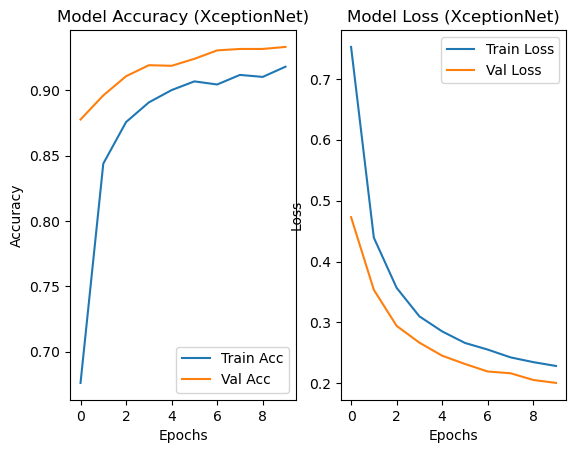

In [8]:
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy (XceptionNet)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss (XceptionNet)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Confusion Matrix

In [ ]:
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

 91/141 ━━━━━━━━━━━━━━━━━━━━ 1:05 1s/step

#  Results Summary (70:30 Split)

In [ ]:
results = {
    "Train-Test Split": ["70:30"],
    "Training Accuracy": [round(max(history.history['accuracy']),2)],
    "Validation Accuracy": [round(max(history.history['val_accuracy']),2)],
    "Stability": ["More Stable"]
}

df = pd.DataFrame(results)
display(df)

# Bar Plot for Train vs Validation

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(["Training", "Validation"], [df["Training Accuracy"][0], df["Validation Accuracy"][0]], color=["skyblue","orange"])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("XceptionNet Performance (70:30 Split)")
plt.show()